In [2]:
import glob
import iris
import iris.coord_categorisation
from iris.experimental.equalise_cubes import equalise_attributes
import matplotlib.pyplot as plt
import iris.plot as iplt
import iris.quickplot as qplt

In [3]:
%matplotlib inline

### Read data

In [4]:
control_files = glob.glob('/g/data/r87/dbi599/drstree/CMIP5/GCM/NCC/NorESM1-M/piControl/mon/ocean/thetao/r1i1p1/thetao_Omon*.nc')
dedrifted_ghg_files = glob.glob('/g/data/r87/dbi599/drstree/CMIP5/GCM/NCC/NorESM1-M/historicalGHG/yr/ocean/thetao/r1i1p1/dedrifted/thetao_Oyr_NorESM1-M_historicalGHG_r1i1p1_*.nc')
ghg_files = glob.glob('/g/data/r87/dbi599/drstree/CMIP5/GCM/NCC/NorESM1-M/historicalGHG/yr/ocean/thetao/r1i1p1/thetao_Oyr_NorESM1-M_historicalGHG_r1i1p1_*.nc')

coefficient_file = '/g/data/r87/dbi599/drstree/CMIP5/GCM/NCC/NorESM1-M/piControl/yr/ocean/thetao/r1i1p1/thetao-coefficients_Oyr_NorESM1-M_piControl_r1i1p1_all.nc'

dedrifted_climatology_file = '/g/data/r87/dbi599/drstree/CMIP5/GCM/NCC/NorESM1-M/historicalGHG/yr/ocean/thetao/r1i1p1/dedrifted/thetao-clim_Oyr_NorESM1-M_historicalGHG_r1i1p1_all.nc'
climatology_file = '/g/data/r87/dbi599/drstree/CMIP5/GCM/NCC/NorESM1-M/historicalGHG/yr/ocean/thetao/r1i1p1/thetao-clim_Oyr_NorESM1-M_historicalGHG_r1i1p1_all.nc'

In [5]:
iris.FUTURE.netcdf_promote=True

In [6]:
# control data
control_list = iris.load(control_files, 'sea_water_potential_temperature')
iris.util.unify_time_units(control_list)
equalise_attributes(control_list)
control_cube = control_list.concatenate_cube()

/g/data/r87/dbi599/miniconda2/envs/default/lib/python2.7/site-packages/iris/fileformats/cf.py:795: UserWarning: Missing CF-netCDF measure variable u'areacello', referenced by netCDF variable u'thetao'
  warnings.warn(message % (variable_name, nc_var_name))
/g/data/r87/dbi599/miniconda2/envs/default/lib/python2.7/site-packages/iris/fileformats/cf.py:795: UserWarning: Missing CF-netCDF measure variable u'volcello', referenced by netCDF variable u'thetao'
  warnings.warn(message % (variable_name, nc_var_name))


In [7]:
# GHG data
ghg_list = iris.load(ghg_files, 'sea_water_potential_temperature')
iris.util.unify_time_units(ghg_list)
equalise_attributes(ghg_list)
ghg_cube = ghg_list.concatenate_cube()

# dedrifted GHG data
dedrifted_ghg_list = iris.load(dedrifted_ghg_files, 'sea_water_potential_temperature')
iris.util.unify_time_units(dedrifted_ghg_list)
equalise_attributes(dedrifted_ghg_list)
dedrifted_ghg_cube = dedrifted_ghg_list.concatenate_cube()

In [8]:
# coefficient data
coefficient_a_cube = iris.load_cube(coefficient_file, 'coefficient a')
coefficient_b_cube = iris.load_cube(coefficient_file, 'coefficient b')
coefficient_c_cube = iris.load_cube(coefficient_file, 'coefficient c')
coefficient_d_cube = iris.load_cube(coefficient_file, 'coefficient d')
control_start = iris.load_cube(coefficient_file, 'sea_water_potential_temperature')

In [9]:
# climatology data
dedrifted_climatology_cube = iris.load_cube(dedrifted_climatology_file)
climatology_cube = iris.load_cube(climatology_file)

In [10]:
print climatology_cube

sea_water_potential_temperature / (K) (depth: 70; cell index along second dimension: 384; cell index along first dimension: 320)
     Dimension coordinates:
          depth                             x                                      -                                      -
          cell index along second dimension -                                      x                                      -
          cell index along first dimension  -                                      -                                      x
     Auxiliary coordinates:
          latitude                          -                                      x                                      x
          longitude                         -                                      x                                      x
     Scalar coordinates:
          time: 1931-07-02 12:00:00, bound=(1850-01-01 00:00:00, 2013-01-01 00:00:00)
     Attributes:
          Conventions: CF-1.5
          associated_files: baseURL: 

### Plot

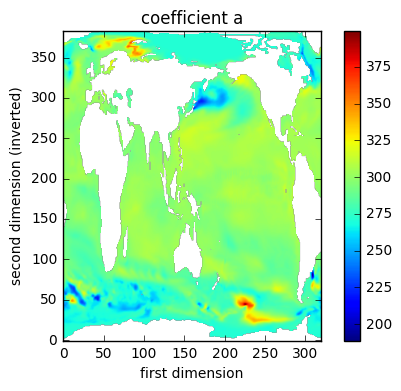

In [11]:
plt.imshow(coefficient_a_cube[0, ::].data)
plt.gca().invert_yaxis()
plt.title('coefficient a')
plt.colorbar()
plt.ylabel('second dimension (inverted)')
plt.xlabel('first dimension')
plt.show()

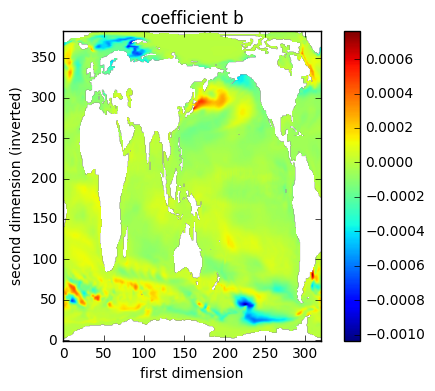

In [12]:
plt.imshow(coefficient_b_cube[0, ::].data)
plt.gca().invert_yaxis()
plt.title('coefficient b')
plt.colorbar()
plt.ylabel('second dimension (inverted)')
plt.xlabel('first dimension')
plt.show()

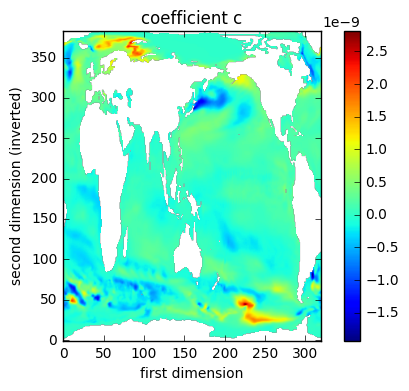

In [13]:
plt.imshow(coefficient_c_cube[0, ::].data)
plt.gca().invert_yaxis()
plt.title('coefficient c')
plt.colorbar()
plt.ylabel('second dimension (inverted)')
plt.xlabel('first dimension')
plt.show()

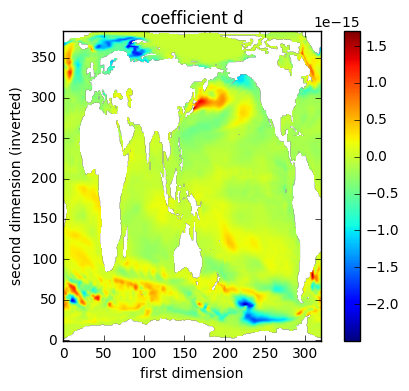

In [14]:
plt.imshow(coefficient_d_cube[0, ::].data)
plt.gca().invert_yaxis()
plt.title('coefficient d')
plt.colorbar()
plt.ylabel('second dimension (inverted)')
plt.xlabel('first dimension')
plt.show()

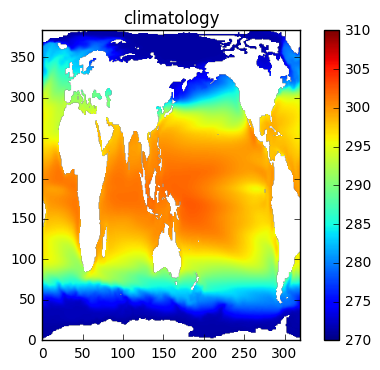

In [15]:
plt.imshow(climatology_cube[0, ::].data, vmin=270, vmax=310)
plt.gca().invert_yaxis()
plt.title('climatology')
plt.colorbar()
plt.show()

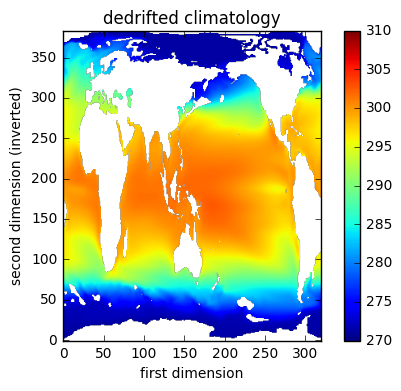

In [16]:
plt.imshow(dedrifted_climatology_cube[0, ::].data, vmin=270, vmax=310)
plt.gca().invert_yaxis()
plt.title('dedrifted climatology')
plt.colorbar()
plt.ylabel('second dimension (inverted)')
plt.xlabel('first dimension')
plt.show()

In [17]:
def convert_to_annual(cube):
    """Convert data to annual timescale.

    Args:
      cube (iris.cube.Cube)
    
    """

    iris.coord_categorisation.add_year(cube, 'time')
    cube = cube.aggregated_by(['year'], iris.analysis.MEAN)
    cube.remove_coord('year')

    return cube

288.449432373
-6.72101887176e-05
1.91973159591e-10
-1.79773610981e-16


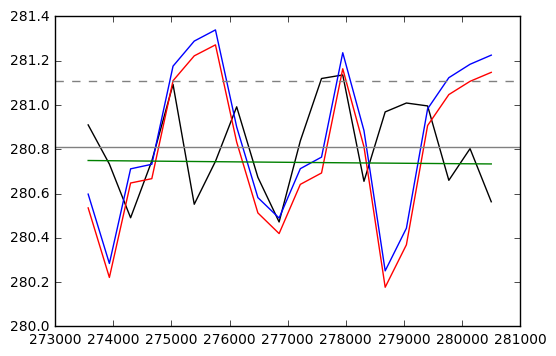

In [19]:
second_dim = 50  # of 384
first_dim = 270 # of 320

control_subset = control_cube[:, 0, second_dim, first_dim]
control_subset = convert_to_annual(control_subset)

ghg_subset = ghg_cube[:, 0, second_dim, first_dim]
ghg_subset = convert_to_annual(ghg_subset)

dedrifted_ghg_subset = dedrifted_ghg_cube[:, 0, second_dim, first_dim]
dedrifted_ghg_subset = convert_to_annual(dedrifted_ghg_subset)

len_ghg  =len(ghg_subset.data)
x = control_subset.coord('time').points

a = coefficient_a_cube[0, second_dim, first_dim].data
b = coefficient_b_cube[0, second_dim, first_dim].data
c = coefficient_c_cube[0, second_dim, first_dim].data
d = coefficient_d_cube[0, second_dim, first_dim].data
start = control_start[0, second_dim, first_dim].data
print a
print b
print c
print d

drift = a + b*x + c*x**2 + d*x**3

plt.plot(x[50:70], control_subset.data[50:70], color='black')
plt.plot(x[50:70], ghg_subset.data[50:70], color='r') 
plt.plot(x[50:70], dedrifted_ghg_subset.data[50:70], color='b')
plt.plot(x[50:70], drift[50:70], color='g')

#plt.plot(x, control_subset.data, color='black')
#plt.plot(x[0:len_ghg], ghg_subset.data, color='r') 
#plt.plot(x[0:len_ghg], dedrifted_ghg_subset.data, color='b')
#plt.plot(x, drift, color='g')

plt.axhline(y=start, color='0.5', linestyle='--')
plt.axhline(y=drift[0], color='0.5')

plt.show()